<a href="https://colab.research.google.com/github/Justabhi96/TF2.0/blob/master/5_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
!pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf

In [0]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
X_train.shape, X_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Dense(128, activation = "tanh"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3238 - accuracy: 0.9055 - val_loss: 0.1961 - val_accuracy: 0.9427
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1887 - accuracy: 0.9436 - val_loss: 0.1428 - val_accuracy: 0.9595
Epoch 3/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1440 - accuracy: 0.9575 - val_loss: 0.1117 - val_accuracy: 0.9656
Epoch 4/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1198 - accuracy: 0.9632 - val_loss: 0.0989 - val_accuracy: 0.9708
Epoch 5/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.1028 - accuracy: 0.9672 - val_loss: 0.0909 - val_accuracy: 0.9724
Epoch 6/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0928 - accuracy: 0.9711 - val_loss: 0.0850 - val_accuracy: 0.9736
Epoch 7/10
60000/60000 [==============================] 

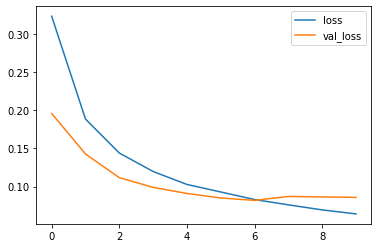

In [0]:
# loss per iteration

import matplotlib.pyplot as plt

plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend()

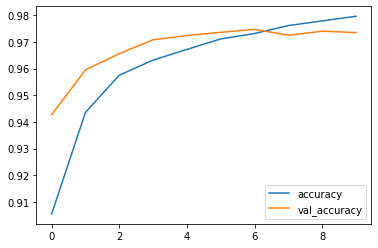

In [0]:
# accuracy per iteration

plt.plot(r.history["accuracy"], label = "accuracy")
plt.plot(r.history["val_accuracy"], label = "val_accuracy")
plt.legend()

In [0]:
import cv2
import pandas as pd
import numpy as np
# import enchant
from scipy import ndimage
from sklearn.cluster import KMeans
from scipy.spatial import distance as dist
from google.colab.patches import cv2_imshow

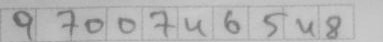

In [0]:
image = cv2.imread("num3.jpg", cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

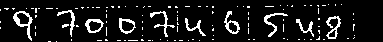

In [0]:
shp = image.shape
block_size = int(shp[1 if shp[0] < shp[1] else 0]/10)
odd_block_size = block_size if block_size%2 != 0 else block_size+1
direct_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                     cv2.THRESH_BINARY_INV, 11, 10)
cv2_imshow(direct_thresh)

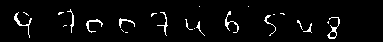

In [0]:
kernel = np.ones((3,3), np.uint8)
dilated_img = cv2.erode(direct_thresh, kernel, iterations = 1)
cv2_imshow(dilated_img)

In [0]:
data = direct_thresh[9:, 320:345]# for 8
# data = direct_thresh[10:, 4:38]# for 9
# data = direct_thresh[10:, 255:283] #for 5
# data = direct_thresh[8:-4, 145:175]
cv2_imshow(data)
res_data = cv2.resize(data, (28, 28)).reshape((1, 28, 28))
res_data.shape
np.argmax(model.predict(res_data))

8

In [0]:
cv2.__version__

'4.1.2'

In [0]:
i = 0

In [0]:
data = X_test[i]
i += 1
cv2_imshow(data*255.0)
res_data = cv2.resize(data, (28, 28)).reshape((1, 28, 28))
res_data.shape
np.argmax(model.predict(res_data))

7

In [0]:
model.predict(res_data)

array([[4.4045132e-07, 2.6867347e-06, 9.5229307e-06, 8.9227734e-03,
        4.7129677e-05, 9.4902259e-01, 3.8812650e-04, 4.0246441e-06,
        4.1360680e-02, 2.4208383e-04]], dtype=float32)

In [0]:
np.argmax(model.predict(res_data))

5